In [1]:
from os import listdir
from os.path import isfile, join
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as math
from scipy.optimize import minimize
import scipy.stats as ss
from scipy.signal import find_peaks 
from matplotlib import rc
import codecs

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#en figur der fylder en kolonne har bredde 5,8, f.eks: fig, ax= plt.subplots(figsize=(5.8,4))
#en figur der fylder to kolonner har dobbeltbredde??

In [3]:
data = np.transpose(np.loadtxt('txts/FIthetas879id0.txt',skiprows=1))
FI879id0 = data[0]
theta879id0 = data[1]
data = np.transpose(np.loadtxt('txts/FIthetas880id0.txt',skiprows=1))
FI880id0 = data[0]
theta880id0 = data[1]
data = np.transpose(np.loadtxt('txts/FIthetas879id1.txt',skiprows=1))
FI879id1 = data[0]
theta879id1 = data[1]
data = np.transpose(np.loadtxt('txts/FIthetas880id1.txt',skiprows=1))
FI880id1 = data[0]
theta880id1 = data[1]

(array([2604., 3246., 3606., 3825., 4330., 4562., 4591., 4540., 4402.,
        4184., 3886., 3278., 2883., 2537., 2064., 1461.]),
 array([ 1.    ,  1.9375,  2.875 ,  3.8125,  4.75  ,  5.6875,  6.625 ,
         7.5625,  8.5   ,  9.4375, 10.375 , 11.3125, 12.25  , 13.1875,
        14.125 , 15.0625, 16.    ]),
 <BarContainer object of 16 artists>)

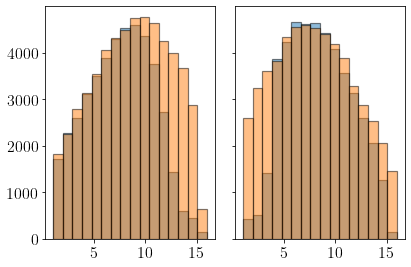

In [4]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

upper = 56000

# We can set the number of bins with the *bins* keyword argument.
ab = axs[0].hist(FI880id0, bins=16, alpha = 0.5,edgecolor='black', linewidth=1.2)
axs[0].hist(FI879id0[1:upper], bins=16, alpha = 0.5,edgecolor='black', linewidth=1.2)
axs[1].hist(FI880id1, bins=16, alpha = 0.5,edgecolor='black', linewidth=1.2)
axs[1].hist(FI879id1[1:upper], bins=16, alpha = 0.5,edgecolor='black', linewidth=1.2)

Text(0.5, 0, 'Lab angle')

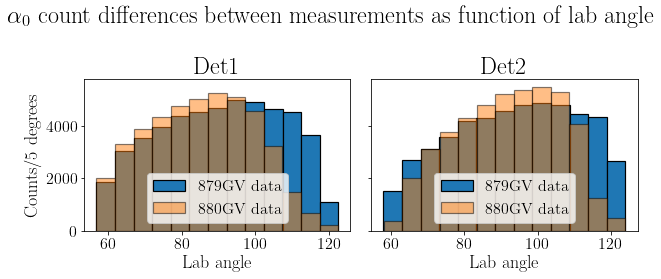

In [20]:
fig, axs = plt.subplots(1, 2,figsize = [9,4],sharey=True, tight_layout=True)

upper = 50000

fig.suptitle(r'$\alpha_0$ count differences between measurements as function of lab angle')

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(theta879id0[1:upper], bins=13, alpha = 1,edgecolor='black', linewidth=1.2,label='879GV data')
axs[0].hist(theta880id0, bins=13, alpha = 0.5,edgecolor='black', linewidth=1.2,label='880GV data')
axs[0].set_title('Det1')
axs[1].hist(theta879id1[1:upper], bins=13, alpha = 1,edgecolor='black', linewidth=1.2,label='879GV data')
axs[1].hist(theta880id1, bins=13, alpha = 0.5,edgecolor='black', linewidth=1.2,label='880GV data')
axs[1].set_title('Det2')
axs[1].legend(loc=8)
axs[0].legend(loc=8)
axs[0].set_ylabel('Counts/5 degrees')
axs[1].set_xlabel('Lab angle')
axs[0].set_xlabel('Lab angle')

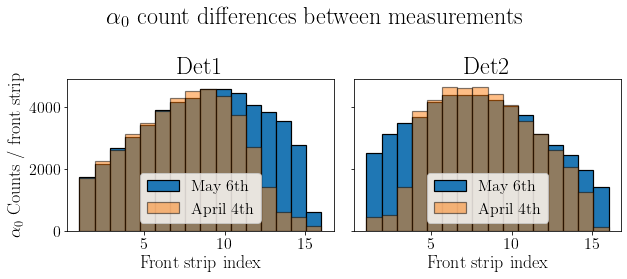

In [28]:
fig, axs = plt.subplots(1, 2,figsize = [9,4],sharey=True, tight_layout=True)

upper = 54000

fig.suptitle(r'$\alpha_0$ count differences between measurements')

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(FI879id0[1:upper], bins=16, alpha = 1,edgecolor='black', linewidth=1.2,label='May 6th')
axs[0].hist(FI880id0, bins=16, alpha = 0.5,edgecolor='black', linewidth=1.2,label='April 4th')
axs[0].set_title('Det1')
axs[1].hist(FI879id1[1:upper], bins=16, alpha = 1,edgecolor='black', linewidth=1.2,label='May 6th')
axs[1].hist(FI880id1, bins=16, alpha = 0.5,edgecolor='black', linewidth=1.2,label='April 4th')
axs[1].set_title('Det2')
axs[1].legend(loc=8)
axs[0].legend(loc=8)
axs[0].set_ylabel(r'$\alpha_0$ Counts / front strip')
axs[1].set_xlabel('Front strip index')
axs[0].set_xlabel('Front strip index')

plt.savefig('txtHists/frontstriphistograms.png',dpi=300, bbox_inches = 'tight',facecolor='white', transparent=False)

In [8]:
data = np.transpose(np.loadtxt('txts/FIthetas879id2.txt',skiprows=1))
FI879id2 = data[0]
theta879id2 = data[1]
data = np.transpose(np.loadtxt('txts/FIthetas880id2.txt',skiprows=1))
FI880id2 = data[0]
theta880id2 = data[1]

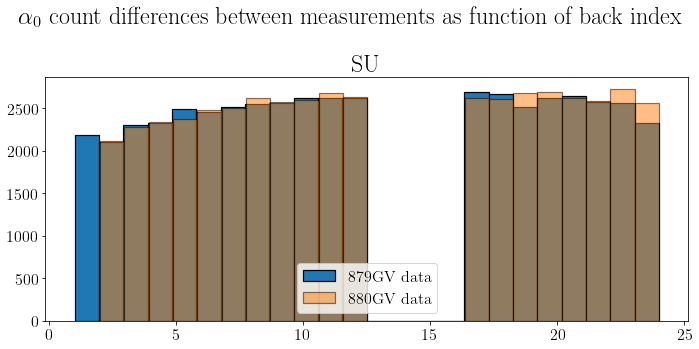

In [9]:
fig, axs = plt.subplots(figsize = [10,5],sharey=True, tight_layout=True)

upper = 50000

fig.suptitle(r'$\alpha_0$ count differences between measurements as function of back index')

# We can set the number of bins with the *bins* keyword argument.
axs.hist(FI879id2[1:upper], bins=24, alpha = 1,edgecolor='black', linewidth=1.2,label='879GV data')
axs.hist(FI880id2, bins=23, alpha = 0.5,edgecolor='black', linewidth=1.2,label='880GV data')
axs.set_title('SU')
axs.legend(loc = 8)

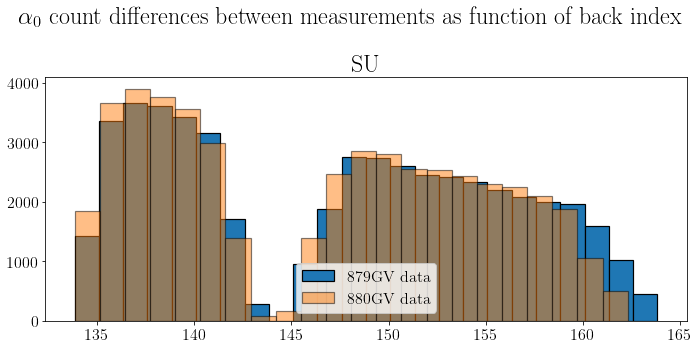

In [10]:
fig, axs = plt.subplots(figsize = [10,5],sharey=True, tight_layout=True)

upper = 50000

fig.suptitle(r'$\alpha_0$ count differences between measurements as function of back index')

# We can set the number of bins with the *bins* keyword argument.
axs.hist(theta879id2[1:upper], bins=24, alpha = 1,edgecolor='black', linewidth=1.2,label='879GV data')
axs.hist(theta880id2, bins=22, alpha = 0.5,edgecolor='black', linewidth=1.2,label='880GV data')
axs.set_title('SU')
axs.legend(loc = 8)

In [3]:
data = np.transpose(np.loadtxt('txts/hitpattern879.txt',skiprows=1))
FI879 = data[0]
BI879 = data[1]

In [4]:
data = np.transpose(np.loadtxt('txts/hitpattern880.txt',skiprows=1))
FI880 = data[0]
BI880 = data[1]

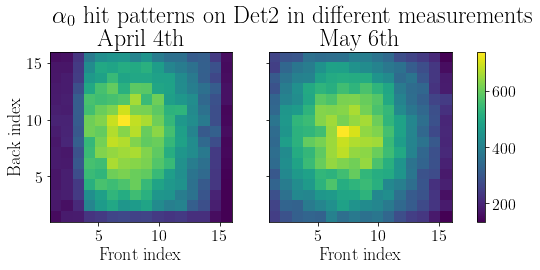

In [5]:
import matplotlib as mpl
fig, ax = plt.subplots(1,2,figsize = [9,3.5],sharey = True)
fig.suptitle(r'$\alpha_0$ hit patterns on Det2 in different measurements')
fig.subplots_adjust(top=0.8)

hist = ax[1].hist2d(FI879,BI879,bins = [16,16]) #norm=mpl.colors.LogNorm()
fig.colorbar(hist[3], ax=ax)
ax[0].set_xlabel('Front index')
ax[0].set_ylabel('Back index')
ax[1].set_title('May 6th')

hist = ax[0].hist2d(FI880,BI880,bins = [16,16])
ax[1].set_xlabel('Front index')
ax[0].set_title('April 4th')
plt.savefig('txtHists/hitpatterns.png',dpi=300, bbox_inches = 'tight',facecolor='white', transparent=False)

In [6]:
x = [1,2,3,4,5,6]
y = [0.84,-1.17,-1.22, -1.23,1.38,1.37]
yerr = [1.94-0.84, -0.18--1.17,-0.18--1.22, -1.23--0.20,1.38-0.35,1.37-0.37]

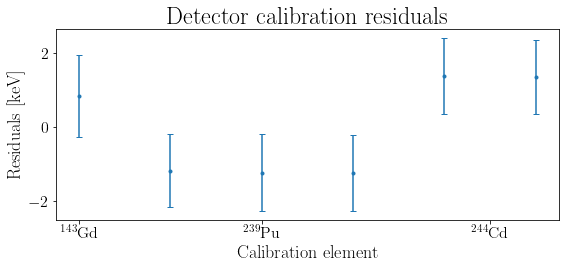

In [18]:
import matplotlib as mpl
fig, ax = plt.subplots(figsize = [9,3.5])
ax.errorbar(x,y,yerr,fmt='.',capsize = 3, label='Residuals')
ax.set_xticks([1,3,5.5])
ax.set_xticklabels([r'$^{143}$Gd',r'$^{239}$Pu',r'$^{244}$Cd'])
ax.set_ylabel('Residuals [keV]')
ax.set_xlabel('Calibration element')
ax.set_title('Detector calibration residuals')
plt.savefig('txtHists/Calibrationresiduals.png',dpi=300, bbox_inches = 'tight',facecolor='white', transparent=False)